<a href="https://colab.research.google.com/github/rani100219-art/Rani-/blob/main/Decision_Tree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is a clean, ready-to-run Python example that:

✔ Generates a synthetic binary classification dataset using make_moons
✔ Adds noise (noise=0.3)
✔ Splits into training and testing sets

Training set shape: (750, 2)
Testing set shape: (250, 2)


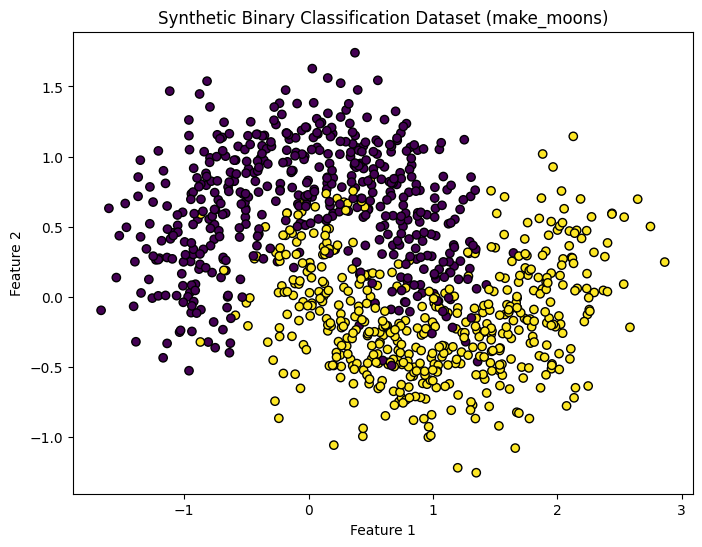

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Generate the synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 3. Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.title("Synthetic Binary Classification Dataset (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Below is a from-scratch implementation of a Decision Tree Classifier using only NumPy — no scikit-learn.

It includes:

✅ Node–splitting criteria (Gini impurity)
✅ Best split search
✅ Recursive tree building
✅ Prediction function

In [2]:
import numpy as np

# ---------------------------------------------------------
# 1. Gini Impurity
# ---------------------------------------------------------
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return 1 - np.sum(prob**2)

# ---------------------------------------------------------
# 2. Calculate Gini for a split
# ---------------------------------------------------------
def gini_split(left_y, right_y):
    n = len(left_y) + len(right_y)
    return (len(left_y)/n) * gini_impurity(left_y) + \
           (len(right_y)/n) * gini_impurity(right_y)

# ---------------------------------------------------------
# 3. Find best split for a node
# ---------------------------------------------------------
def best_split(X, y):
    best_feature, best_threshold = None, None
    best_gini = 1.0
    n_samples, n_features = X.shape

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            left_indices = X[:, feature] <= t
            right_indices = ~left_indices

            if left_indices.sum() == 0 or right_indices.sum() == 0:
                continue  # ignore empty splits

            g = gini_split(y[left_indices], y[right_indices])

            if g < best_gini:
                best_feature = feature
                best_threshold = t
                best_gini = g

    return best_feature, best_threshold, best_gini

# ---------------------------------------------------------
# 4. Node structure
# ---------------------------------------------------------
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # class label at leaf

# ---------------------------------------------------------
# 5. Build decision tree recursively
# ---------------------------------------------------------
def build_tree(X, y, depth=0, max_depth=None, min_samples_split=2):

    # Stopping conditions
    if len(np.unique(y)) == 1:
        return Node(value=y[0])

    if max_depth is not None and depth >= max_depth:
        majority_class = np.bincount(y).argmax()
        return Node(value=majority_class)

    if len(y) < min_samples_split:
        majority_class = np.bincount(y).argmax()
        return Node(value=majority_class)

    feature, threshold, gini = best_split(X, y)

    if feature is None:
        majority_class = np.bincount(y).argmax()
        return Node(value=majority_class)

    # Split the dataset
    left_indices = X[:, feature] <= threshold
    right_indices = ~left_indices

    left_node = build_tree(X[left_indices], y[left_indices], depth+1, max_depth, min_samples_split)
    right_node = build_tree(X[right_indices], y[right_indices], depth+1, max_depth, min_samples_split)

    return Node(feature, threshold, left_node, right_node)

# ---------------------------------------------------------
# 6. Prediction for a single sample
# ---------------------------------------------------------
def predict_one(x, tree):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)

# ---------------------------------------------------------
# 7. Batch prediction
# ---------------------------------------------------------
def predict(X, tree):
    return np.array([predict_one(x, tree) for x in X])

In [3]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

tree = build_tree(X, y, max_depth=4)

y_pred = predict(X, tree)
accuracy = (y_pred == y).mean()
print("Accuracy:", accuracy)

Accuracy: 0.914


Below is a complete Random Forest implementation from scratch using ONLY NumPy, built on top of the decision-tree logic you already implemented.

It includes:

✅ Bootstrap sampling
✅ Random subset of features at each split (feature bagging)
✅ Training multiple trees (e.g., 10 trees)
✅ Majority-vote prediction

Everything is fully NumPy-based — no scikit-learn.

In [4]:
import numpy as np

# ----------------------- Gini Impurity -----------------------
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return 1 - np.sum(prob**2)

# ----------------------- Gini for split -----------------------
def gini_split(left_y, right_y):
    n = len(left_y) + len(right_y)
    return (len(left_y)/n)*gini_impurity(left_y) + (len(right_y)/n)*gini_impurity(right_y)

# ----------------------- Best Split (with feature subset) -----------------------
def best_split(X, y, feature_indices):
    best_feature = None
    best_threshold = None
    best_gini = 1.0

    for feature in feature_indices:
        thresholds = np.unique(X[:, feature])

        for t in thresholds:
            left = X[:, feature] <= t
            right = ~left

            if left.sum() == 0 or right.sum() == 0:
                continue

            g = gini_split(y[left], y[right])

            if g < best_gini:
                best_feature = feature
                best_threshold = t
                best_gini = g

    return best_feature, best_threshold, best_gini

# ----------------------- Node class -----------------------
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

2. Build a Single Decision Tree with Feature Bagging

In [5]:
def build_tree(X, y, max_depth=None, depth=0, min_samples_split=2, n_features=None):

    # Stopping conditions
    if len(np.unique(y)) == 1:
        return Node(value=y[0])

    if max_depth is not None and depth >= max_depth:
        return Node(value=np.bincount(y).argmax())

    if len(y) < min_samples_split:
        return Node(value=np.bincount(y).argmax())

    n_total_features = X.shape[1]

    # random subset of features
    if n_features is None:
        n_features = int(np.sqrt(n_total_features))  # default RF rule

    feature_indices = np.random.choice(n_total_features, n_features, replace=False)

    feature, threshold, gini = best_split(X, y, feature_indices)

    if feature is None:
        return Node(value=np.bincount(y).argmax())

    # Create splits
    left_idx = X[:, feature] <= threshold
    right_idx = ~left_idx

    left_node = build_tree(X[left_idx], y[left_idx], max_depth, depth+1, min_samples_split, n_features)
    right_node = build_tree(X[right_idx], y[right_idx], max_depth, depth+1, min_samples_split, n_features)

    return Node(feature, threshold, left_node, right_node)

Tree Prediction

In [6]:
def predict_one(x, tree):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)

def predict_tree(X, tree):
    return np.array([predict_one(x, tree) for x in X])

Random Forest Implementation
✔ Bootstrap sampling
✔ Multiple trees
✔ Feature bagging
✔ Majority vote

In [7]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = len(y)
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = build_tree(
                X_sample, y_sample,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=self.n_features
            )
            self.trees.append(tree)

    def predict(self, X):
        # Collect predictions from all trees
        tree_preds = np.array([predict_tree(X, tree) for tree in self.trees])
        # Majority vote along axis 0
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=600, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rf = RandomForest(n_trees=10, max_depth=6)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = (y_pred == y_test).mean()

print("Random Forest Accuracy:", acc)

Random Forest Accuracy: 0.8933333333333333


Below is the evaluation code for your custom Random Forest model.
It will calculate:

✔ Accuracy
✔ Precision
✔ Recall
✔ F1-score
✔ Full classification report (from scikit-learn

In [11]:
rf = RandomForest(n_trees=10, max_depth=6)
rf.fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8933333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        80
           1       0.86      0.91      0.89        70

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



✅ Plots the decision boundary of a single decision tree (e.g., tree #0)
✅ Plots the decision boundary of the full Random Forest ensemble
✅ Displays both plots side-by-side for comparison

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Helper: predict grid for any model (tree or forest)
# ---------------------------------------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # If model is a single tree
    if hasattr(model, "value") or hasattr(model, "threshold"):
        Z = predict_tree(grid, model)
    else:   # If model is the random forest
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

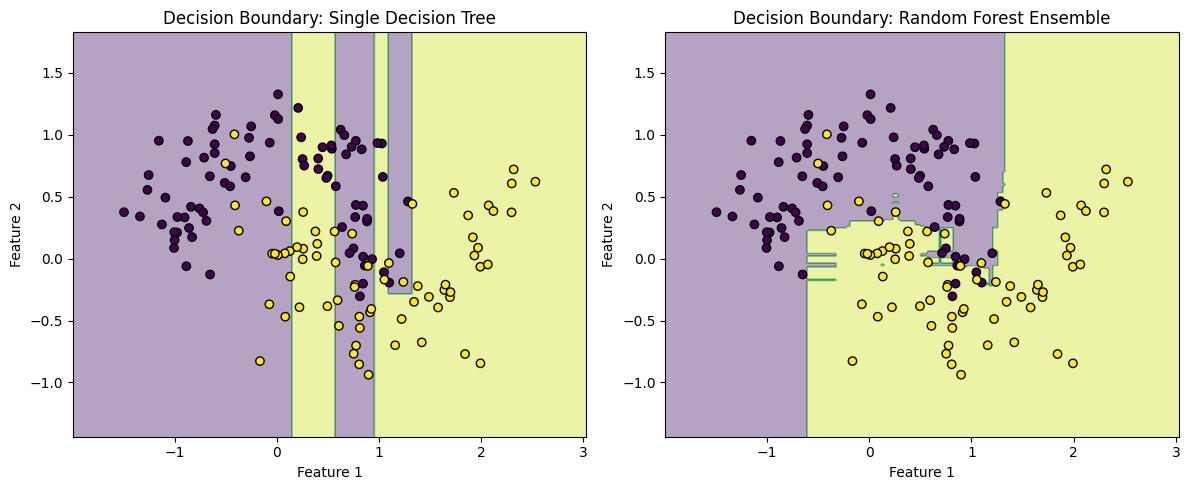

In [14]:
# Pick one tree from the forest
single_tree = rf.trees[0]

plt.figure(figsize=(12, 5))

# -- Left: Single Tree --
plt.subplot(1, 2, 1)
plot_decision_boundary(single_tree, X_test, y_test,
                       title="Decision Boundary: Single Decision Tree")

# -- Right: Random Forest Ensemble --
plt.subplot(1, 2, 2)
plot_decision_boundary(rf, X_test, y_test,
                       title="Decision Boundary: Random Forest Ensemble")

plt.show()